In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('cleandata.csv')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_37172\849593925.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='product_name', data=top_10_sales, palette='viridis')


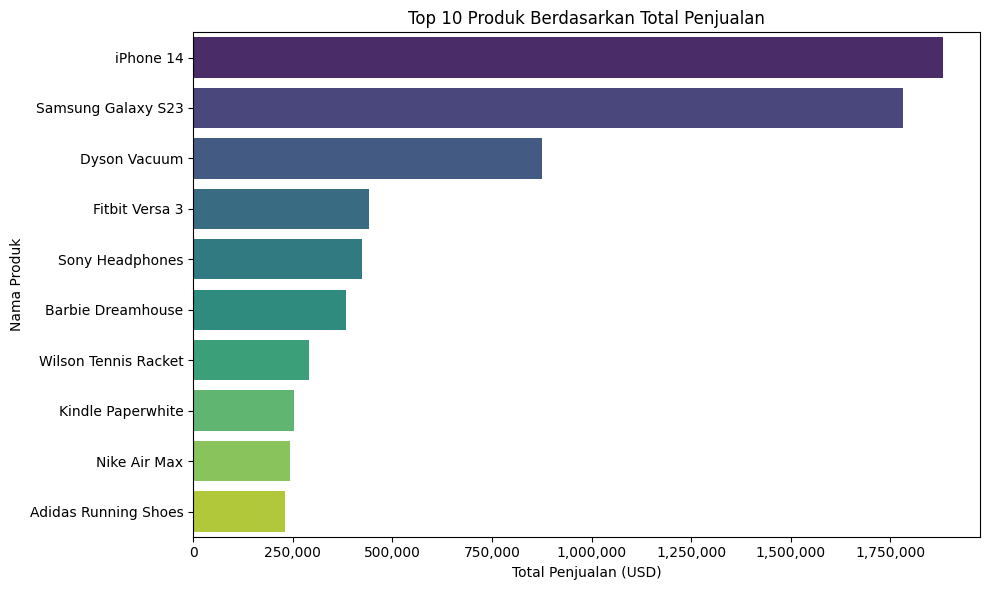

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37172\849593925.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_rating', y='product_name', data=top_10_rating, palette='Greens_d')


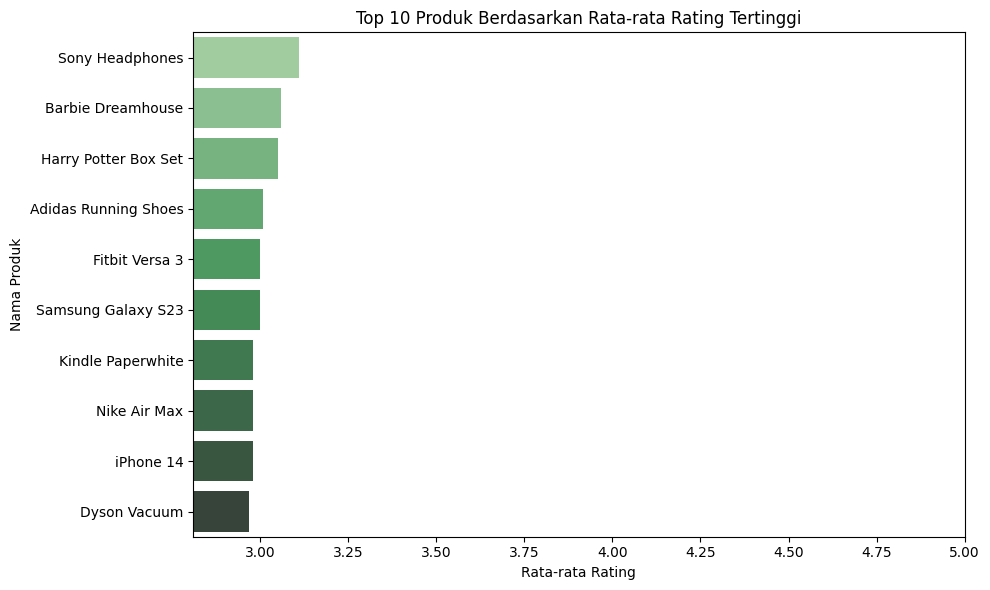

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37172\849593925.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_rating', y='product_name', data=bottom_10_rating, palette='Reds_d')


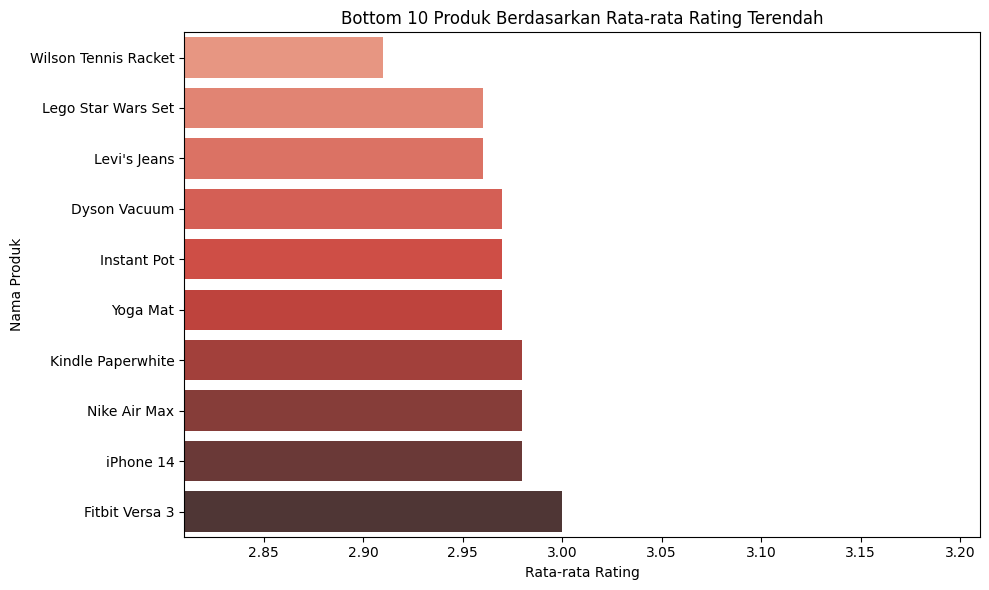

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 1. Memuat Data (Diasumsikan cleandata.csv sudah dimuat ke dalam DataFrame df)
# df = pd.read_csv("cleandata.csv") 

# --- Perhitungan Metrik Kinerja Produk ---

# a. Top 10 Produk Berdasarkan Total Penjualan
sales_performance = df.groupby('product_name')['total_sales'].sum().reset_index()
top_10_sales = sales_performance.sort_values(by='total_sales', ascending=False).head(10)

# b. Produk Berdasarkan Rata-rata Rating
rating_performance = df.groupby('product_name')['rating'].mean().reset_index()
rating_performance = rating_performance.round(2)
rating_performance = rating_performance.rename(columns={'rating': 'average_rating'})

# c. Top 10 Produk dengan Rata-rata Rating Tertinggi
top_10_rating = rating_performance.sort_values(by='average_rating', ascending=False).head(10)

# d. Bottom 10 Produk dengan Rata-rata Rating Terendah
bottom_10_rating = rating_performance.sort_values(by='average_rating', ascending=True).head(10)

# --- Visualisasi ---

# 1. Grafik: Top 10 Produk Berdasarkan Total Penjualan
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales', y='product_name', data=top_10_sales, palette='viridis')
plt.title('Top 10 Produk Berdasarkan Total Penjualan')
plt.xlabel('Total Penjualan (USD)')
plt.ylabel('Nama Produk')
# Formatter untuk menampilkan angka penjualan tanpa notasi ilmiah dan dengan pemisah ribuan
formatter = FuncFormatter(lambda x, p: f'{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# 2. Grafik: Top 10 Produk Berdasarkan Rata-rata Rating Tertinggi
plt.figure(figsize=(10, 6))
sns.barplot(x='average_rating', y='product_name', data=top_10_rating, palette='Greens_d')
plt.title('Top 10 Produk Berdasarkan Rata-rata Rating Tertinggi')
plt.xlabel('Rata-rata Rating')
plt.ylabel('Nama Produk')
plt.xlim(rating_performance['average_rating'].min()-0.1, 5)
plt.tight_layout()
plt.show()

# 3. Grafik: Bottom 10 Produk Berdasarkan Rata-rata Rating Terendah
plt.figure(figsize=(10, 6))
sns.barplot(x='average_rating', y='product_name', data=bottom_10_rating, palette='Reds_d')
plt.title('Bottom 10 Produk Berdasarkan Rata-rata Rating Terendah')
plt.xlabel('Rata-rata Rating')
plt.ylabel('Nama Produk')
plt.xlim(rating_performance['average_rating'].min()-0.1, rating_performance['average_rating'].max()+0.1)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37172\4011456411.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='product_name', data=bottom_10_sales, palette='Oranges_d')


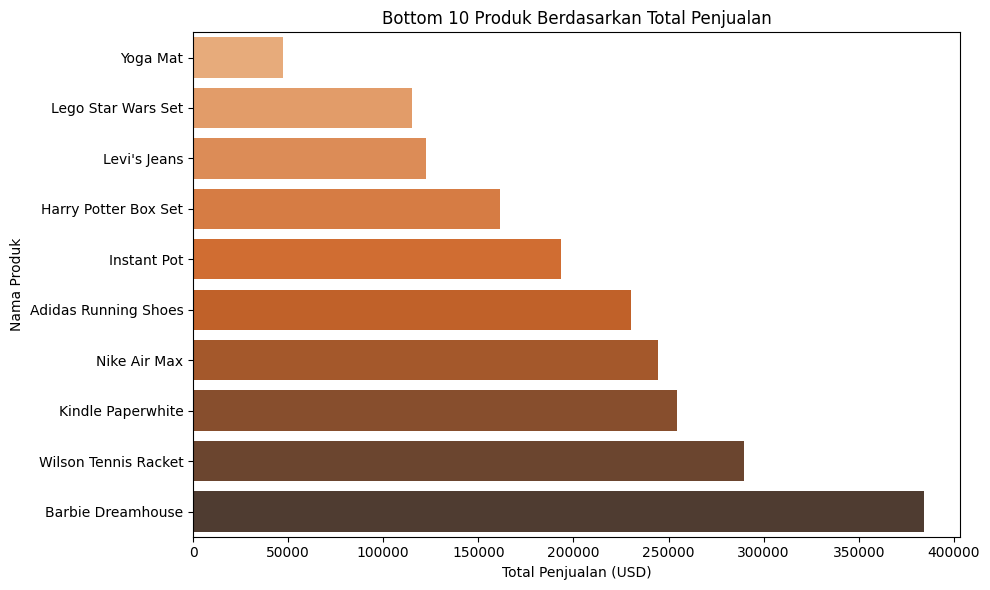

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Diasumsikan 'df' adalah DataFrame yang sudah dimuat dari 'cleandata.csv'

# 1. Menghitung Total Penjualan per Produk
sales_performance = df.groupby('product_name')['total_sales'].sum().reset_index()

# 2. Mendapatkan 10 Produk dengan Penjualan Terendah
bottom_10_sales = sales_performance.sort_values(by='total_sales', ascending=True).head(10)

# 3. Visualisasi: Bottom 10 Produk Berdasarkan Total Penjualan
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales', y='product_name', data=bottom_10_sales, palette='Oranges_d')
plt.title('Bottom 10 Produk Berdasarkan Total Penjualan')
plt.xlabel('Total Penjualan (USD)')
plt.ylabel('Nama Produk')

# Formatter untuk menampilkan angka penjualan tanpa koma sebagai pemisah ribuan
def remove_thousands_separator(x, pos):
    return '{:,.0f}'.format(x).replace(',', '')

formatter = FuncFormatter(remove_thousands_separator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()